# medical visualization

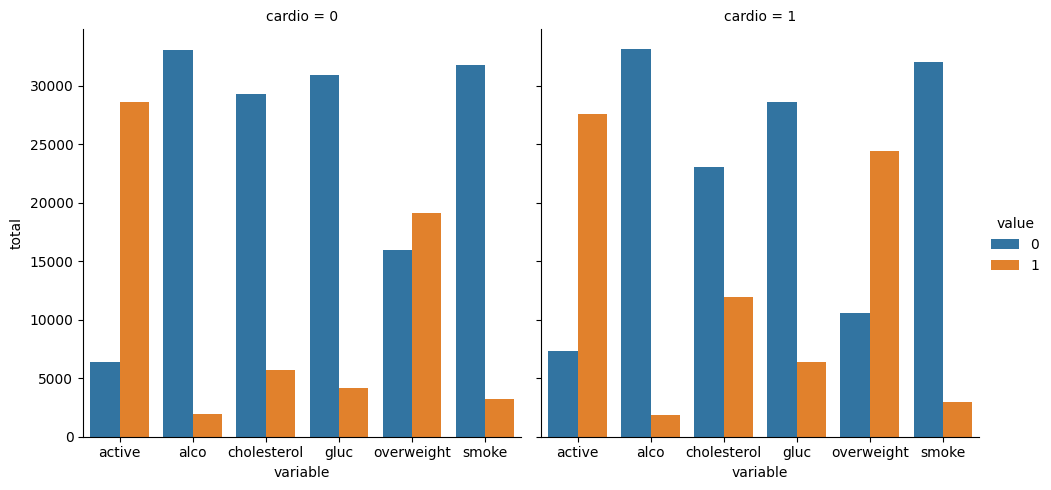

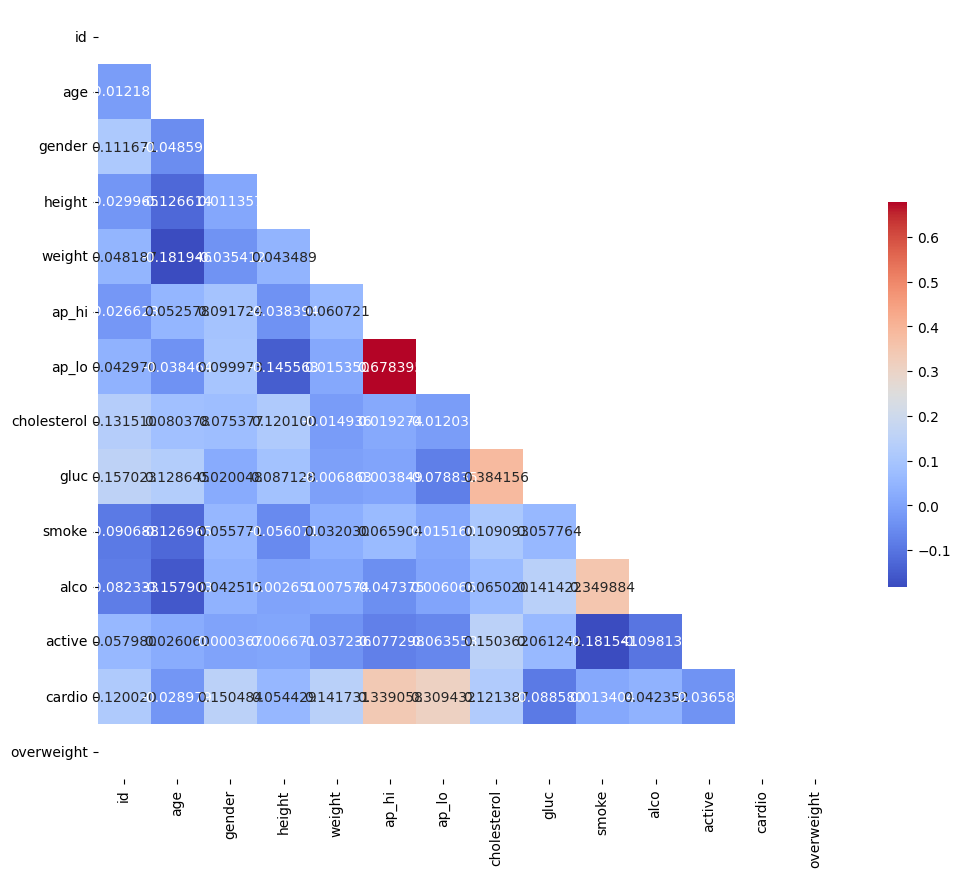

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df=pd.read_csv('medicalexamination.csv')

df['BMI']=df['weight']/((df['height']/100)**2)
df['overweight']=(df['BMI']>25).astype(int)
df.drop(columns=['BMI'],inplace=True)

df['cholesterol']=(df['cholesterol']>1).astype(int)
df['gluc']=(df['gluc']>1).astype(int)

def draw_cat_plot():
    df_cat=pd.melt(df,id_vars=['cardio'],value_vars=['cholesterol','gluc','smoke','alco','active','overweight'])

    df_cat = df_cat.groupby(['cardio', 'variable', 'value']).size().reset_index(name='total')

    fig = sns.catplot(x='variable',y='total',hue='value',col='cardio',data = df_cat,kind='bar',height=5,aspect=1).fig

    return fig

def draw_heat_map():
    df_heat=df[(df['ap_lo']<=df['ap_hi'])&
            (df['height']>=df['height'].quantile(0.025))&
            (df['height']>=df['height'].quantile(0.975))&
            (df['weight']>=df['weight'].quantile(0.025))&
            (df['weight']>=df['weight'].quantile(0.975))]
    
    

    corr=df_heat.corr()


    mask=np.triu(np.ones_like(corr,dtype=bool))

    fig,ax = plt.subplots(figsize=(12,10))


    sns.heatmap(corr,mask=mask,annot=True,fmt='1f',cmap='coolwarm',cbar_kws={'shrink':.5},ax=ax)

    return fig

cat_plot_fig = draw_cat_plot()
plt.show() 

heat_map_fig = draw_heat_map()
plt.show() 